# Homework 3 Solutions

In [1]:
%cd "/home/cody/Physics 331/Textbook Programs/Chapter 2"
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 2
 bisect_eq2.py            deriv_eq2.py  'figure 2.1.png'  'figure 2.4.png'
 bisect.py                equation2.py  'Figure 2.2.png'   newton.py
'Chapter 2 Stuff.ipynb'   equation3.py  'figure 2.3.png'   __pycache__/


### Step 1) Zero one side.
Put everything on one side of the equation. This is don't with my kepler_equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def kepler_equation(u,t,e):
    """
    Keplers Equation, 't' needs to be declaired as a global variable outside of the function.
    
    Input
    ----------
    u: Mean anomoly (radians)
    t: Time I want to evaluate things at (day)
    e: Eccentricity (unitless)
    
    """
    T = 2.23263889 #Time of pericenter passage (days)
    P = 365.25 #Period of Earth (days) 
    kepler = u - e*np.sin(u) - 2*np.pi / P * (t - T)
    return kepler

### Step 2) Plot
Because I'm going to be solving keplers equation over and over again for different time values

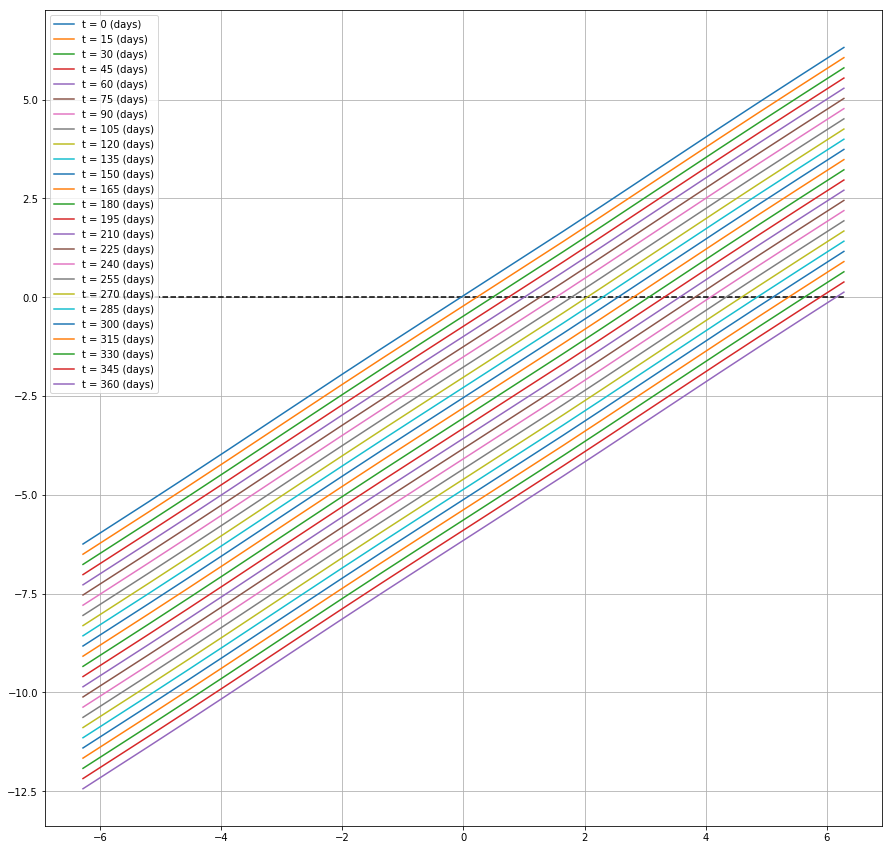

In [3]:
us = np.arange(-2*np.pi,2*np.pi, 0.001) #Range of 'u' that I want to plot over
plt.figure(figsize = (15,15))
plt.grid(which='major', axis='both') #Add grid lines
times = np.arange(0,365,15) #List of times I want to plot keplers equation for
for t in times:
    plt.plot(us, kepler_equation(us,t,0.0167), label = 't = {} (days)'.format(t))
plt.legend()
plt.hlines(0,-2*np.pi, 2*np.pi, linestyles='dashed')

I want to solve for all of the points where the lines cross zero.

### Step 3) Run Bisect
I can't run $bisect.py$ that's in the book as is, I'll need to make a few changes to it. In lines 20,21 and , 28 when we evaluate func_name() at some point, it's only expecting one argument. The way I've writen kepler_equation, it's expecting 3 arguments, so I need to change bisect to be ready to handle those. 

In [4]:
import numpy as np
def bisect(func_name, xL, xR):
    """
    Find the solution the input equation f(x) = 0 for some input function. Start
    with the interval xL xR, and return a solution with a relative error
    0.5e-5.

    Inputs
    ----------
    func_name: This is the name of the function that I want to find roots for

    xL:        Smaller 'x' value I want to evaluate func_name at

    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    fL = func_name(xL)
    fR = func_name(xR)
    #print("Function at the left: {} \nFunction at the right: {} ".format(fL, fR))
    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        fMP = func_name(xMP)

        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP

        else:
            xL = xMP
            fL = fMP
    x_zero = 0.5 * (xL + xR)

    return x_zero

In [5]:
import numpy as np
def bisect_HW3(func_name, xL, xR):
    """
    This is a bisect program writen just for HW3! This is ment to solve kepler_equation.py at a specified time
    and with specified eccentricity

    Inputs
    ----------
    func_name: This is the name of the function that I want to find roots for. This input
               should only be 'kepler_equation'

    xL:        Smaller 'x' value I want to evaluate func_name at

    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    fL = func_name(xL,t,e)    #Changed these lines to handle 3 inputs
    fR = func_name(xR,t,e)
    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        fMP = func_name(xMP,t,e)

        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP
        else:
            xL = xMP
            fL = fMP
    x_zero = 0.5 * (xL + xR)

    return x_zero

Now I want to write a function that will solve keplers equation for all the different times values. I could just write this as a single cell but I like it when everything is in a function. 

In [6]:
def eccentric_anomaly(times, eccentricity):
    u = []
    global t, e
    e = eccentricity
    for n in times:
        t = n
        u_temp = bisect_HW3(kepler_equation, -2*np.pi, 2*np.pi)
        u.append(u_temp)
    return u

#### global ?
In line three I have

        global t, e
        
this is makeing so that $t$ and $e$ can be known inside other functions. Remember that when I define a varraible inside a function, it is only known inside that function. $\textit{eccentric_anomaly}$ wont tell $\textit{bisect_HW3}$ what $t$ and $e$ are. 

Adding the 'global' line is telling the computer; any time you see a 't' or an 'e' look at this 'global' varriable for it's value.  
Comment out line 3 and see what happens. 

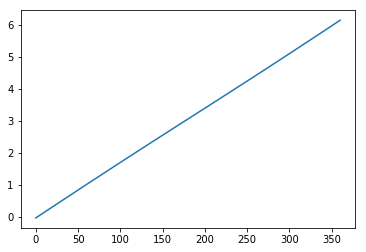

In [7]:
times = np.arange(0,365,15)
u = eccentric_anomaly(times, 0.0167)
plt.plot(times, u)

In [8]:
#Check my solutions, when i plug in u and t I should get something
#close to zero. 
kepler_equation(u,times,0.0167)

array([-1.02951290e-07,  6.40431218e-08,  1.13382728e-07,  2.07621634e-06,
        2.60614293e-06, -4.50888262e-06,  1.67827165e-06,  4.75937038e-07,
        2.27604151e-06, -2.36237277e-06,  9.12274097e-06, -5.81943803e-06,
       -7.82685662e-06,  4.99597270e-06,  5.38017315e-06,  3.58331764e-07,
       -3.01043876e-06, -7.91519805e-06,  9.29825053e-06,  2.08773432e-06,
       -1.73804747e-05, -2.25519142e-05, -2.08155192e-05, -7.60104965e-07,
        7.47633045e-06])

Now that I know everything is working lets put it all together and make a nice plot

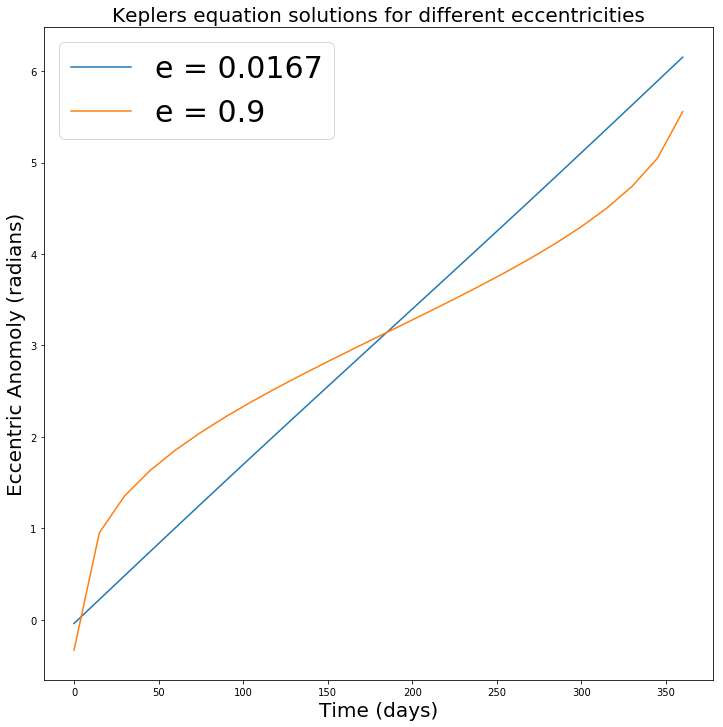

In [9]:
times = np.arange(0,365,15)
u = eccentric_anomaly(times, 0.0167)
u2 = eccentric_anomaly(times,0.9)
plt.figure(figsize = (12,12))
plt.plot(times,u, label = 'e = 0.0167')
plt.plot(times, u2, label = 'e = 0.9')
plt.xlabel('Time (days)', size = 20)
plt.ylabel('Eccentric Anomoly (radians)', size = 20)
plt.title('Keplers equation solutions for different eccentricities', size = 20)
plt.legend(fontsize = 30)
plt.show()

I might want to use smaller step sizes for the higher eccentricity orbits. Because they are going to change more rapidly around pericenter, the graph looks jaged and not smooth. So lets do another plot just for fun but with smaller steps

In [10]:
u

[-0.03905902326224097,
 0.22332827815348946,
 0.48545848049429713,
 0.7470516397565335,
 1.0078643263718088,
 1.267709286825976,
 1.526496639432246,
 1.784169459122318,
 2.040775682795813,
 2.2964111842519737,
 2.5512617189768343,
 2.8054950661190685,
 3.0593928549639524,
 3.3132187384594047,
 3.5672124011035318,
 3.8216374958442514,
 4.076733707179672,
 4.332692782708277,
 4.589682501578745,
 4.847738816465787,
 5.106885695819218,
 5.367087186964318,
 5.6281994792022285,
 5.890030824934457,
 6.152293602763282]

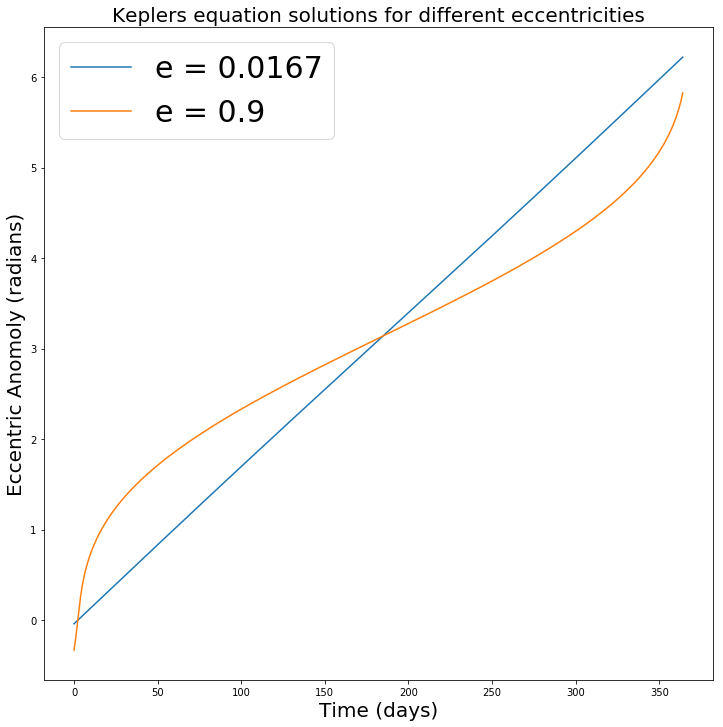

In [11]:
times = np.arange(0,365,1)
u = eccentric_anomaly(times, 0.0167)
u2 = eccentric_anomaly(times,0.9)
plt.figure(figsize = (12,12))
plt.plot(times,u, label = 'e = 0.0167')
plt.plot(times, u2, label = 'e = 0.9')
plt.xlabel('Time (days)', size = 20)
plt.ylabel('Eccentric Anomoly (radians)', size = 20)
plt.title('Keplers equation solutions for different eccentricities', size = 20)
plt.legend(fontsize = 30)
plt.show()

In [12]:
u

[-0.03905902326224097,
 -0.021564395569347198,
 -0.004069920019933677,
 0.01342462574954765,
 0.030919206629062883,
 0.04841345981492835,
 0.06590743212052261,
 0.083401591679631,
 0.10089481497116869,
 0.11838728924864976,
 0.13587976352613085,
 0.15337186329658367,
 0.1708613415178384,
 0.18835231776720632,
 0.2058402979603479,
 0.22332827815348946,
 0.24081476031851787,
 0.258299744455433,
 0.27578472859234826,
 0.29326671667303716,
 0.3107494537677828,
 0.32822844579224525,
 0.3457044417604816,
 0.3631804377287177,
 0.38065643369695396,
 0.39812943360896386,
 0.4155994374647474,
 0.43306644526430454,
 0.45053345306386183,
 0.46799746480719256,
 0.48545848049429713,
 0.5029165001251754,
 0.5203745197560536,
 0.5378295433307052,
 0.5552785747929043,
 0.5727276062551037,
 0.5901736416610766,
 0.6076151829827098,
 0.6250582223324564,
 0.6424952695697502,
 0.6599263246945913,
 0.6773573798194324,
 0.6947884349442736,
 0.712213497956662,
 0.7296325688565978,
 0.7470516397565335,
 0.76446

The large jump at the beginning is pericenter. This is the point of closest approach, and when the orbiting object is moving the fastest. 